<img src="Enron.png" />

In [17]:
import pandas as pd
import numpy as np
import copy, time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
data_path = 'desktop/3rd/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_features.csv')

False    100
True      13
Name: poi, dtype: int64
詐欺犯比例: 11.504424778761061 %
False    100
True      13
Name: poi, dtype: int64


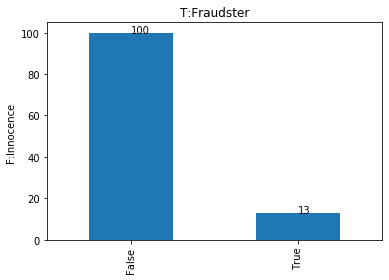

In [18]:
#詐欺犯資料視覺化
fig = plt.figure()
fig.set(alpha=0.2) #設定圖表顏色參數
df_train.poi.value_counts().plot(kind='bar')
plt.title('T:Fraudster')
plt.ylabel('F:Innocence ')
#plt.text(-0.1,credit_train.fraud_ind.value_counts()[0],credit_train.fraud_ind.value_counts()[0])
#plt.text(0.9,credit_train.fraud_ind.value_counts()[1],credit_train.fraud_ind.value_counts()[1])
poi = df_train.poi.value_counts()

x = np.arange(poi.shape[0])
y = np.array(poi)
for i,j in zip(x,y):
    plt.text(i,j,j) 
print(df_train.poi.value_counts())
print('詐欺犯比例:',(13/113)*100,"%")
print(poi)

In [19]:
train_Y = df_train['poi']
ids = df_test['name']
df_train = df_train.drop(['name'] , axis=1)
df_test = df_test.drop(['name'] , axis=1)
#重新編排索引
df = pd.concat([df_train,df_test],axis=0, ignore_index=True)
df.head(10)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,...,NaN,2856.0,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,...,NaN,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,...,NaN,101740.0,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,...,71023.0,200308.0,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bonus,82.0,2.374235e+06,1.071333e+07,70000.0,431250.00,769375.0,1200000.00,97343619.0
deferral_payments,39.0,1.642674e+06,5.161930e+06,-102500.0,81573.00,227449.0,1002671.50,32083396.0
deferred_income,49.0,-1.140475e+06,4.025406e+06,-27992891.0,-694862.00,-159792.0,-38346.00,-833.0
director_fees,17.0,1.668049e+05,3.198914e+05,3285.0,98784.00,108579.0,113784.00,1398517.0
exercised_stock_options,102.0,5.987054e+06,3.106201e+07,3285.0,527886.25,1310813.5,2547724.00,311764000.0
expenses,95.0,1.087289e+05,5.335348e+05,148.0,22614.00,46950.0,79952.50,5235198.0
from_messages,86.0,6.087907e+02,1.841034e+03,12.0,22.75,41.0,145.50,14368.0
from_poi_to_this_person,86.0,6.489535e+01,8.697924e+01,0.0,10.00,35.0,72.25,528.0
from_this_person_to_poi,86.0,4.123256e+01,1.000731e+02,0.0,1.00,8.0,24.75,609.0
loan_advances,4.0,4.196250e+07,4.708321e+07,400000.0,1600000.00,41762500.0,82125000.00,83925000.0


In [21]:
df.isnull().sum().sort_values(ascending=False)

loan_advances                142
director_fees                129
restricted_stock_deferred    128
deferral_payments            107
deferred_income               97
long_term_incentive           80
bonus                         64
from_this_person_to_poi       60
from_poi_to_this_person       60
from_messages                 60
shared_receipt_with_poi       60
to_messages                   60
other                         53
expenses                      51
salary                        51
exercised_stock_options       44
restricted_stock              36
email_address                 35
poi                           33
total_payments                21
total_stock_value             20
dtype: int64

In [22]:
df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,14.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,...,NaN,2856.0,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,NaN,...,NaN,147950.0,True,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,...,NaN,101740.0,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,...,71023.0,200308.0,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [23]:
#df['deferral_payments'].median()

In [24]:
#df['deferred_income'].median()

In [25]:
#填入遺漏值
#loan_advances(預支款):
df["loan_advances"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['loan_advances']])

#director_fees(董事酬勞)：
df["director_fees"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['director_fees']])

#bonus : 員工不一定都有
df["bonus"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['bonus']])

#long_term_incentive : 員工不一定都有
df["long_term_incentive"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['long_term_incentive']])

#restricted_stock_deferred(限制股票期約權利-依當前公允價值計算市值):
df["restricted_stock_deferred"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['restricted_stock_deferred']])

#exercised_stock_options(已行使的股票選擇權)
df["exercised_stock_options"] = df["exercised_stock_options"].fillna(df['exercised_stock_options'].quantile(0.2))
#df["exercised_stock_options"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['exercised_stock_options']])

#restricted_stock:
#df["restricted_stock"] = df["restricted_stock"].fillna(df['restricted_stock'].median())
df["restricted_stock"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['restricted_stock']])

#df["shared_receipt_with_poi"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['shared_receipt_with_poi']])


#------------------------------以上資訊並非所有員工所擁有福利或資源,遺漏值設定為0-------------------------------------------


#要注意填補順序

df.loc[(df['deferral_payments'].isna()==1)&(df['deferred_income'].isna()==0),'deferral_payments']= df['deferral_payments'].quantile(0.6)
df.loc[(df['deferred_income'].isna()==1)&(df['deferral_payments'].isna()==0),'deferred_income']= df['deferred_income'].quantile(0.2)
df.loc[(df['deferral_payments'].isna()==1)&(df['deferred_income'].isnull()),['deferral_payments','deferred_income']]= 0

#from_messages(接收信件量):
df["from_messages"] = df["from_messages"].fillna(df['from_messages'].quantile(0.3))

#from_poi_to_this_person:
df["from_poi_to_this_person"] = df["from_poi_to_this_person"].fillna(df['from_poi_to_this_person'].quantile(0.02))

#from_this_person_to_poi:
df["from_this_person_to_poi"] = df["from_this_person_to_poi"].fillna(df['from_this_person_to_poi'].quantile(0.05))

#shared_receipt_with_poi
df["shared_receipt_with_poi"] = df["shared_receipt_with_poi"].fillna(df['shared_receipt_with_poi'].quantile(0.02))

#to_messages:
df["to_messages"] = df["to_messages"].fillna(df['to_messages'].quantile(0.8))


#other:
df["other"] = df["other"].fillna(df['other'].quantile(0.2))

#expenses:
df["expenses"] = df["expenses"].fillna(df['expenses'].quantile(0.2))

#salary:
df["salary"] = df["salary"].fillna(df['salary'].quantile(0.2))


#email_address: 缺失值捕0
df["email_address"] = pd.Series([i if not pd.isnull(i) else 0 for i in df['email_address']])
lbl = LabelEncoder() 
lbl.fit(list(df["email_address"].values)) 
df["email_address"] = lbl.transform(list(df["email_address"].values))

#total_payments:
df["total_payments"] = df["total_payments"].fillna(df['total_payments'].quantile(0.2))

#total_stock_value:
df["total_stock_value"] = df["total_stock_value"].fillna(df['total_stock_value'].quantile(0.2))

#poi：
df["poi"] = pd.Series([i if not pd.isnull(i) else False for i in df['poi']])




In [26]:
df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,632536.8,-3504386.0,0.0,56,19794175.0,46950.0,18.0,42.0,4.0,...,1617011.0,174839.0,True,2748364.0,0.0,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,0.0,0.0,0.0,36,19250000.0,29336.0,108.0,88.0,30.0,...,1920000.0,22122.0,True,6843672.0,0.0,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,632536.8,-4167.0,0.0,83,1624396.0,22884.0,39.0,13.0,14.0,...,0.0,1573324.0,True,869220.0,0.0,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,0.0,0.0,0.0,73,402958.0,118134.0,27.0,0.0,0.0,...,602671.0,907502.0,True,985032.0,0.0,224305.0,7.9,3093.0,2652612.0,985032.0
4,1250000.0,632536.8,-262500.0,0.0,10,402958.0,35818.0,144.0,199.0,25.0,...,375304.0,486.0,True,126027.0,0.0,240189.0,2188.0,2598.0,1639297.0,126027.0
5,0.0,10259.0,-838938.2,0.0,45,30766064.0,77978.0,27.0,0.0,0.0,...,0.0,2856.0,True,0.0,0.0,201395.4,7.9,3093.0,91093.0,30766064.0
6,0.0,0.0,0.0,0.0,98,8308552.0,53947.0,27.0,0.0,0.0,...,0.0,147950.0,True,3576206.0,0.0,158403.0,7.9,3093.0,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,0.0,111,402958.0,16514.0,40.0,240.0,11.0,...,0.0,101740.0,True,698242.0,0.0,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,0.0,57,34348384.0,99832.0,36.0,123.0,16.0,...,3600000.0,10359729.0,True,14761694.0,0.0,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,0.0,0.0,0.0,4,384728.0,125978.0,16.0,52.0,6.0,...,71023.0,200308.0,True,393818.0,0.0,274975.0,874.0,873.0,1272284.0,778546.0


In [27]:
#檢查遺失值狀態
def na_check(df):
    data_na = (df.isnull().sum() / len(df)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    #創建新對象看資料遺失率
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(30))
na_check(df)

,Missing Ratio


In [28]:
#篩選重點1-驗別高管身份
#特徵假設1：bonus & salary 佔 total_payments 比率高代表高層級其嫌疑者度高
df ['total_bonus_payments_rate'] = df['bonus']/df['total_payments']
#df ['total_salary_income_rate'] = df['salary']/df['total_payments']
df ['bonus_salary_rate'] = df['bonus'] / df['salary']
#df ['salary_bonus_rate'] = df['salary'] / df['bonus']
#inf = np.isinf(df['salary_bonus_rate'])
#df['salary_bonus_rate'][inf]=0
#核心成員
#df ['long_term_incentive_salary_rate'] = df['long_term_incentive']/df['salary']
df ['total_long_term_incentive_rate'] = df['long_term_incentive']/df['total_payments']

#篩選重點2:與嫌疑者溝通高頻者其嫌疑程度高
#特徵假設1：
df ['from_poi_to_this_person_rate'] = df['from_poi_to_this_person']/df['from_messages']
df ['from_this_person_to_poi_rate'] = df['from_this_person_to_poi']/df['from_messages']
df['from_this_person_to_poi_rate'] = pd.Series([i if not pd.isnull(i) else 0 for i in df['from_this_person_to_poi_rate']])


#特徵假設2：詐欺高層的報銷單據
df ['to_message_shared_receipt_with_poi_rate'] = df['shared_receipt_with_poi']/df['to_messages']


#篩選重點3-薪水,獎金及個人借貸狀況
#特徵假設1：deferral_payments 佔 total_payments 比率高其嫌疑者度高
#借貸與收支狀況
df ['loan_advances_salary_rate'] = df['loan_advances']/df['salary']

#篩選重點4-應收與應付之間的關係

#df ['deferred_income_bonus_rate'] = df['deferred_income'].abs()/df['bonus']
#df ['deferred_income_bonus_rate'] = pd.Series([i if not pd.isnull(i) else 0 for i in df['deferred_income_bonus_rate']])
#inf = np.isinf(df['deferred_income_bonus_rate'])
#df ['deferred_income_bonus_rate'][inf]=0

df ['deferral_payments_bonus_rate'] = df['deferral_payments']/df['bonus']
df ['deferral_payments_bonus_rate'] = pd.Series([i if not pd.isnull(i) else 0 for i in df['deferral_payments_bonus_rate']])
inf = np.isinf(df['deferral_payments_bonus_rate'])
df ['deferral_payments_bonus_rate'][inf]=0



#篩選重點5-股票選擇權轉換狀況:
df ['exercised_stock_options_salary_rate'] = df['exercised_stock_options']/df['salary']
#df ['bonus_stotal_stock_value_rate'] = df['bonus']/df['total_stock_value']
#df ['exercised_stock_options_total_payments'] = df['exercised_stock_options']/df['total_payments']

#篩選重點6-一般支出與其他花費:
df ['other_expenses_salary_rate'] = (df['expenses']+df['other'])/df['salary']


df.drop(labels = ['from_this_person_to_poi','to_messages','from_poi_to_this_person',\
'from_messages','deferral_payments','deferred_income','total_payments','bonus','salary',\
 'expenses','total_payments','other','exercised_stock_options',\
'total_stock_value','restricted_stock','restricted_stock_deferred','director_fees',\
'loan_advances','long_term_incentive','shared_receipt_with_poi'], axis = 1, inplace = True)



In [29]:
df

,email_address,poi,total_bonus_payments_rate,bonus_salary_rate,total_long_term_incentive_rate,from_poi_to_this_person_rate,from_this_person_to_poi_rate,to_message_shared_receipt_with_poi_rate,loan_advances_salary_rate,deferral_payments_bonus_rate,exercised_stock_options_salary_rate,other_expenses_salary_rate
0,56,True,3.465003,4.160367,3.201685,2.333333,0.222222,0.954696,0.000000,0.361450,47.057729,0.527271
1,36,True,0.644959,5.039334,0.221129,0.814815,0.277778,0.563000,0.000000,0.000000,17.322710,0.046306
2,83,True,0.099806,0.944091,0.000000,0.333333,0.358974,0.404444,0.000000,3.162684,7.667888,7.534828
3,73,True,0.301590,3.566572,0.227199,0.000000,0.000000,0.002554,0.000000,0.000000,1.796474,4.572506
4,10,True,0.762522,5.204235,0.228942,1.381944,0.173611,0.842186,0.000000,0.506029,1.677671,0.151148
5,45,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.002554,0.000000,0.000000,152.764482,0.401370
6,98,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.002554,0.000000,0.000000,52.451986,1.274578
7,111,True,0.805183,4.158840,0.000000,6.000000,0.275000,0.643914,0.000000,0.023008,1.396532,0.409833
8,57,True,0.067594,6.527896,0.034763,3.416667,0.444444,0.564241,76.026675,0.028987,32.031811,9.754132
9,4,True,0.471593,2.182017,0.055823,3.250000,0.375000,1.001145,0.000000,0.000000,1.399138,1.186602


In [30]:
#看出各特徵與poi相關性
df.corr()['poi']

email_address                              0.108909
poi                                        1.000000
total_bonus_payments_rate                  0.159712
bonus_salary_rate                          0.077580
total_long_term_incentive_rate             0.106508
from_poi_to_this_person_rate               0.151664
from_this_person_to_poi_rate               0.201941
to_message_shared_receipt_with_poi_rate    0.143555
loan_advances_salary_rate                  0.263523
deferral_payments_bonus_rate               0.043950
exercised_stock_options_salary_rate       -0.018783
other_expenses_salary_rate                -0.025186
Name: poi, dtype: float64

In [31]:
#利用隨機森林的feature importance對特徵的重要性進行排序。

x_feature = list(df.columns)
x_val = df[x_feature]
y_val = df['poi']
y_val=y_val.astype('int')

names = df[x_feature].columns 
from sklearn.ensemble import RandomForestClassifier 
clf=RandomForestClassifier(n_estimators=10,random_state=123)#構建分類隨機森林分類器

clf.fit(x_val, y_val) #對自變量和因變量進行擬合 

names, clf.feature_importances_ 
for feature in zip(names, clf.feature_importances_):
    print(feature)


('email_address', 0.018842748804091453)
('poi', 0.5360785092338524)
('total_bonus_payments_rate', 0.016965046074460838)
('bonus_salary_rate', 0.06607365861666331)
('total_long_term_incentive_rate', 0.017902427964517974)
('from_poi_to_this_person_rate', 0.031112194635146757)
('from_this_person_to_poi_rate', 0.06290138126654167)
('to_message_shared_receipt_with_poi_rate', 0.07307632470194522)
('loan_advances_salary_rate', 0.021544107354633663)
('deferral_payments_bonus_rate', 0.019270639258798038)
('exercised_stock_options_salary_rate', 0.0538467853161856)
('other_expenses_salary_rate', 0.08238617677316314)


In [32]:
df.drop(columns='poi').shape

(146, 11)

In [33]:
#進行資料標準化
df_std = df.drop(columns='poi')
df_std = StandardScaler().fit_transform(df_std)


In [34]:
df_std.shape

(146, 11)

In [35]:
df_std = pd.DataFrame(df_std)

In [36]:
df_std.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.365088,5.418778,0.546049,5.485324,1.025066,0.616976,1.606626,-0.089145,0.119946,-0.028548,-0.090599
1,-0.178819,0.531125,0.784360,0.060667,0.098789,0.918159,0.548760,-0.089145,-0.429112,-0.071082,-0.093617
2,1.099362,-0.413726,-0.325965,-0.341791,-0.194909,1.358350,0.120546,-0.089145,4.375151,-0.084892,-0.046615
3,0.827409,-0.063998,0.385057,0.071715,-0.398238,-0.587757,-0.964851,-0.089145,-0.429112,-0.093291,-0.065208
4,-0.885897,0.734882,0.829069,0.074887,0.444731,0.353441,1.302767,-0.089145,0.339570,-0.093461,-0.092959


In [37]:
df.shape

(146, 12)

In [38]:
df_std.columns = df.drop(columns='poi').columns

In [39]:
 df_std.head()

,email_address,total_bonus_payments_rate,bonus_salary_rate,total_long_term_incentive_rate,from_poi_to_this_person_rate,from_this_person_to_poi_rate,to_message_shared_receipt_with_poi_rate,loan_advances_salary_rate,deferral_payments_bonus_rate,exercised_stock_options_salary_rate,other_expenses_salary_rate
0,0.365088,5.418778,0.546049,5.485324,1.025066,0.616976,1.606626,-0.089145,0.119946,-0.028548,-0.090599
1,-0.178819,0.531125,0.784360,0.060667,0.098789,0.918159,0.548760,-0.089145,-0.429112,-0.071082,-0.093617
2,1.099362,-0.413726,-0.325965,-0.341791,-0.194909,1.358350,0.120546,-0.089145,4.375151,-0.084892,-0.046615
3,0.827409,-0.063998,0.385057,0.071715,-0.398238,-0.587757,-0.964851,-0.089145,-0.429112,-0.093291,-0.065208
4,-0.885897,0.734882,0.829069,0.074887,0.444731,0.353441,1.302767,-0.089145,0.339570,-0.093461,-0.092959


In [40]:
train_num = train_Y.shape[0]
train_X = df_std[:train_num]
test_X = df_std[train_num:]



In [41]:
#設置驗證
x_train, x_test, y_train, y_test = train_test_split(train_X, train_Y,
                                                    test_size=0.25, random_state=42)

In [42]:
x_train.head()

,email_address,total_bonus_payments_rate,bonus_salary_rate,total_long_term_incentive_rate,from_poi_to_this_person_rate,from_this_person_to_poi_rate,to_message_shared_receipt_with_poi_rate,loan_advances_salary_rate,deferral_payments_bonus_rate,exercised_stock_options_salary_rate,other_expenses_salary_rate
108,-0.559553,0.192540,-0.015913,-0.341791,-0.398238,-0.587757,-0.964851,-0.089145,-0.429112,-0.093454,-0.084144
78,0.555455,-0.031802,0.453376,-0.341791,-0.398238,-0.587757,-0.964851,-0.089145,-0.429112,-0.011939,-0.049293
15,-0.042842,0.144471,0.345287,0.409588,0.691025,0.186714,1.566390,-0.089145,-0.429112,-0.091456,-0.091775
30,-1.157851,-0.586708,-0.581932,-0.341791,-0.398238,-0.587757,-0.964851,-0.089145,-0.429112,-0.095160,-0.093365
103,1.371315,-0.586708,-0.581932,-0.341791,-0.398238,-0.587757,-0.715645,-0.089145,-0.429112,-0.092356,-0.093365


In [43]:
y_train.head()

108    False
78     False
15     False
30     False
103    False
Name: poi, dtype: bool

In [44]:
# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
lr = LogisticRegression(tol=0.001, penalty='l1', fit_intercept=True, C=1.0)

gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=20,
                                  max_depth=6, learning_rate=0.03)

rf = RandomForestClassifier(n_estimators=250, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=20, bootstrap=True)


In [45]:
lr = LogisticRegression()
print(cross_val_score(lr, x_train, y_train, cv=5).mean())
gdbt = GradientBoostingClassifier()
print(cross_val_score(gdbt, x_train, y_train, cv=5).mean())
rf = RandomForestClassifier()
print(cross_val_score(rf, x_train, y_train, cv=5).mean())

0.881454248366013
0.843954248366013
0.893954248366013


In [46]:
# LOGIS迴歸預測檔 
lr.fit(x_train, y_train)
lr_pred = lr.predict_proba(test_X)[:,1]

sub = pd.DataFrame({'name': ids, 'poi': lr_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.4 else 0) 
sub.to_csv('enron_lr.csv', index=False) 
sub.head(35)

,name,poi
0,BELDEN TIMOTHY N,0
1,BOWEN JR RAYMOND M,1
2,HANNON KEVIN P,1
3,DELAINEY DAVID W,0
4,CAUSEY RICHARD A,0
5,HICKERSON GARY J,0
6,FREVERT MARK A,1
7,CHAN RONNIE,0
8,DONAHUE JR JEFFREY M,1
9,REYNOLDS LAWRENCE,0


In [47]:
# 梯度提升機預測檔
gdbt.fit(x_train, y_train)
gdbt_pred = gdbt.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': gdbt_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.4 else 0) 
sub.to_csv('enron_gebt_2.csv', index=False)
sub.head(35)

,name,poi
0,BELDEN TIMOTHY N,0
1,BOWEN JR RAYMOND M,0
2,HANNON KEVIN P,0
3,DELAINEY DAVID W,0
4,CAUSEY RICHARD A,0
5,HICKERSON GARY J,0
6,FREVERT MARK A,1
7,CHAN RONNIE,0
8,DONAHUE JR JEFFREY M,1
9,REYNOLDS LAWRENCE,0


In [48]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': rf_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.1 else 0) 
sub.to_csv('enron_rf5.csv', index=False) 
sub.head(35)

,name,poi
0,BELDEN TIMOTHY N,1
1,BOWEN JR RAYMOND M,1
2,HANNON KEVIN P,1
3,DELAINEY DAVID W,0
4,CAUSEY RICHARD A,1
5,HICKERSON GARY J,1
6,FREVERT MARK A,1
7,CHAN RONNIE,0
8,DONAHUE JR JEFFREY M,1
9,REYNOLDS LAWRENCE,0


In [49]:
#blending
blending_pred = lr_pred*0.2  + gdbt_pred*0.3 + rf_pred*0.5
sub = pd.DataFrame({'name': ids, 'poi': blending_pred})
sub['poi'] =  sub['poi'].map(lambda x:1 if x>0.4else 0) 
sub.to_csv('enron_blending.csv', index=False)
sub.head(35)


,name,poi
0,BELDEN TIMOTHY N,0
1,BOWEN JR RAYMOND M,1
2,HANNON KEVIN P,1
3,DELAINEY DAVID W,0
4,CAUSEY RICHARD A,0
5,HICKERSON GARY J,0
6,FREVERT MARK A,1
7,CHAN RONNIE,0
8,DONAHUE JR JEFFREY M,1
9,REYNOLDS LAWRENCE,0


In [50]:
#Stack
from mlxtend.classifier import StackingClassifier

meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.70, n_estimators=50, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
stacking = StackingClassifier(classifiers=[lr, gdbt, rf], meta_classifier=meta_estimator, use_probas=True, average_probas=False)
meta_estimator = RandomForestClassifier()
print(cross_val_score(meta_estimator, train_X, train_Y, cv=5).mean())

0.8936758893280633


In [51]:

stacking.fit(train_X, train_Y)
stacking_pred = stacking.predict(test_X)
sub = pd.DataFrame({'name': ids, 'poi': rf_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('enron_stacking.csv', index=False)
sub.head(35)

,name,poi
0,BELDEN TIMOTHY N,0
1,BOWEN JR RAYMOND M,1
2,HANNON KEVIN P,0
3,DELAINEY DAVID W,0
4,CAUSEY RICHARD A,0
5,HICKERSON GARY J,0
6,FREVERT MARK A,0
7,CHAN RONNIE,0
8,DONAHUE JR JEFFREY M,1
9,REYNOLDS LAWRENCE,0


In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
GradientBoostingClassifier()
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
parameters = {
    'learning_rate':[0.02,0.04,0.06],
    'n_estimators':[100,200,300,400]
}

In [55]:
gs = GridSearchCV(GradientBoostingClassifier(),parameters,refit=True)
#gs = GridSearchCV(RandomForestClassifier(),parameters,refit=True)

In [56]:
gs.fit(x_train,y_train)
#gs.fit(train_X, train_Y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [57]:
print(gs.best_score_)
print(gs.best_params_)

0.8214285714285714
{'learning_rate': 0.02, 'n_estimators': 200}
